## 📚 Tabel Buku

,id,judul,penulis,tahun
0,1,Laskar Pelangi,Andrea Hirata,2005
1,2,Bumi Manusia,Pramoedya Ananta Toer,1980
2,3,Negeri 5 Menara,Ahmad Fuadi,2009
3,4,Filosofi Kopi,Dee Lestari,2006
4,5,Dilan 1990,Pidi Baiq,2014


## 👥 Tabel Anggota

,id,nama,email
0,1,Rendi,rendi@example.com
1,2,Sinta,sinta@example.com
2,3,Andi,andi@example.com


## 📖 Tabel Peminjaman

,id,id_anggota,id_buku,tgl_pinjam,tgl_kembali
0,1,1,1,2025-11-01,2025-11-05
1,2,1,2,2025-11-02,None
2,3,2,3,2025-11-03,2025-11-07
3,4,3,4,2025-11-04,2025-11-09


## 🔗 Daftar Peminjaman Lengkap (JOIN Antara 3 Tabel)

,id,nama_anggota,judul_buku,tgl_pinjam,tgl_kembali
0,1,Rendi,Laskar Pelangi,2025-11-01,2025-11-05
1,2,Rendi,Bumi Manusia,2025-11-02,None
2,3,Sinta,Negeri 5 Menara,2025-11-03,2025-11-07
3,4,Andi,Filosofi Kopi,2025-11-04,2025-11-09


## 📊 Jumlah Total Buku yang Dipinjam per Anggota

,nama_anggota,total_pinjaman
0,Andi,1
1,Rendi,2
2,Sinta,1


## ⏱️ Data dengan Durasi Peminjaman (Hari)

,id,nama_anggota,judul_buku,tgl_pinjam,tgl_kembali,durasi_hari
0,1,Rendi,Laskar Pelangi,2025-11-01,2025-11-05,4.0
1,2,Rendi,Bumi Manusia,2025-11-02,NaT,NaN
2,3,Sinta,Negeri 5 Menara,2025-11-03,2025-11-07,4.0
3,4,Andi,Filosofi Kopi,2025-11-04,2025-11-09,5.0


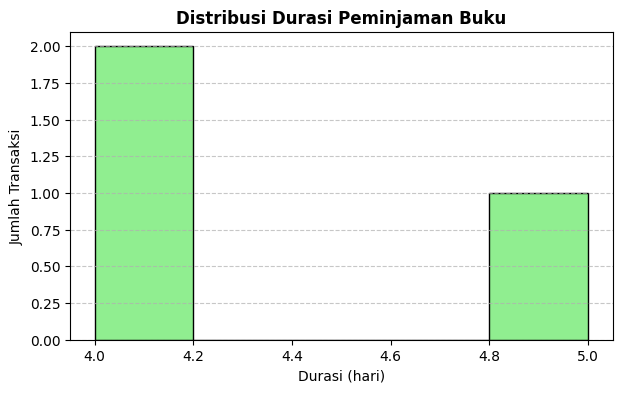

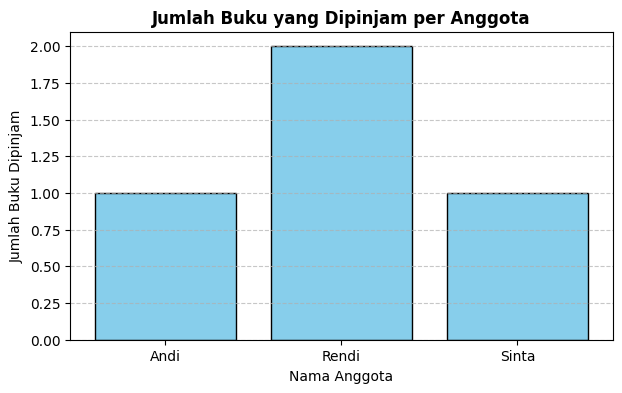

In [11]:
# ===============================
# MODUL 9 - SISTEM BASIS DATA PERPUSTAKAAN (SQLite + Pandas + Visualisasi)
# Nama : Rendiansyah Perdinata
# NIM  : 411222072
# ===============================

# --- Import Library ---
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# --- Membuat database SQLite di memori (selalu bersih saat dijalankan ulang) ---
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# ==========================================================
# 1️⃣ MEMBUAT TABEL
# ==========================================================
cursor.execute('''
CREATE TABLE buku (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    judul TEXT NOT NULL,
    penulis TEXT NOT NULL,
    tahun INTEGER NOT NULL
);
''')

cursor.execute('''
CREATE TABLE anggota (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nama TEXT NOT NULL,
    email TEXT NOT NULL
);
''')

cursor.execute('''
CREATE TABLE peminjaman (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_anggota INTEGER,
    id_buku INTEGER,
    tgl_pinjam TEXT,
    tgl_kembali TEXT,
    FOREIGN KEY (id_anggota) REFERENCES anggota(id),
    FOREIGN KEY (id_buku) REFERENCES buku(id)
);
''')

# ==========================================================
# 1A. MENAMBAHKAN DATA
# ==========================================================
cursor.executemany('INSERT INTO buku (judul, penulis, tahun) VALUES (?, ?, ?)', [
    ('Laskar Pelangi', 'Andrea Hirata', 2005),
    ('Bumi Manusia', 'Pramoedya Ananta Toer', 1980),
    ('Negeri 5 Menara', 'Ahmad Fuadi', 2009),
    ('Filosofi Kopi', 'Dee Lestari', 2006),
    ('Dilan 1990', 'Pidi Baiq', 2014)
])

cursor.executemany('INSERT INTO anggota (nama, email) VALUES (?, ?)', [
    ('Rendi', 'rendi@example.com'),
    ('Sinta', 'sinta@example.com'),
    ('Andi', 'andi@example.com')
])

cursor.executemany('''
INSERT INTO peminjaman (id_anggota, id_buku, tgl_pinjam, tgl_kembali)
VALUES (?, ?, ?, ?)
''', [
    (1, 1, '2025-11-01', '2025-11-05'),  # Rendi pinjam Laskar Pelangi
    (1, 2, '2025-11-02', None),          # Rendi pinjam Bumi Manusia (belum kembali)
    (2, 3, '2025-11-03', '2025-11-07'),  # Sinta pinjam Negeri 5 Menara
    (3, 4, '2025-11-04', '2025-11-09')   # Andi pinjam Filosofi Kopi
])
conn.commit()

# ==========================================================
# 1B. TAMPILKAN ISI SETIAP TABEL
# ==========================================================
display(Markdown("## 📚 Tabel Buku"))
display(pd.read_sql_query("SELECT * FROM buku;", conn))

display(Markdown("## 👥 Tabel Anggota"))
display(pd.read_sql_query("SELECT * FROM anggota;", conn))

display(Markdown("## 📖 Tabel Peminjaman"))
display(pd.read_sql_query("SELECT * FROM peminjaman;", conn))

# ==========================================================
# 1C. TAMPILKAN DAFTAR PEMINJAMAN (JOIN)
# ==========================================================
display(Markdown("## 🔗 Daftar Peminjaman Lengkap (JOIN Antara 3 Tabel)"))
query_join = '''
SELECT p.id, a.nama AS nama_anggota, b.judul AS judul_buku,
       p.tgl_pinjam, p.tgl_kembali
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
JOIN buku b ON p.id_buku = b.id
ORDER BY p.id;
'''
df_join = pd.read_sql_query(query_join, conn)
display(df_join)

# ==========================================================
# 1D. JUMLAH TOTAL BUKU YANG DIPINJAM PER ANGGOTA
# ==========================================================
display(Markdown("## 📊 Jumlah Total Buku yang Dipinjam per Anggota"))
query_group = '''
SELECT a.nama AS nama_anggota, COUNT(p.id) AS total_pinjaman
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
GROUP BY a.nama;
'''
df_group = pd.read_sql_query(query_group, conn)
display(df_group)

# ==========================================================
# 2A. BUAT DATAFRAME DARI HASIL QUERY
# ==========================================================
df = df_join.copy()

# ==========================================================
# 2B. HITUNG DURASI PEMINJAMAN (DALAM HARI)
# ==========================================================
df['tgl_pinjam'] = pd.to_datetime(df['tgl_pinjam'])
df['tgl_kembali'] = pd.to_datetime(df['tgl_kembali'])
df['durasi_hari'] = (df['tgl_kembali'] - df['tgl_pinjam']).dt.days

display(Markdown("## ⏱️ Data dengan Durasi Peminjaman (Hari)"))
display(df)

# ==========================================================
# 2C. VISUALISASI DATA
# ==========================================================
# Grafik 1 - Histogram Durasi Peminjaman
plt.figure(figsize=(7,4))
plt.hist(df['durasi_hari'].dropna(), bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribusi Durasi Peminjaman Buku', fontsize=12, weight='bold')
plt.xlabel('Durasi (hari)')
plt.ylabel('Jumlah Transaksi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Grafik 2 - Diagram Batang Jumlah Buku per Anggota
plt.figure(figsize=(7,4))
plt.bar(df_group['nama_anggota'], df_group['total_pinjaman'], color='skyblue', edgecolor='black')
plt.title('Jumlah Buku yang Dipinjam per Anggota', fontsize=12, weight='bold')
plt.xlabel('Nama Anggota')
plt.ylabel('Jumlah Buku Dipinjam')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()